In [3]:
# pandas 패키지 import 
import pandas as pd

In [1]:
# geopandas 패키지 import - 필요시 geopandas folium mapclassify 패키지 설치 
import geopandas as gpd

c:\Users\Gaia3D\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Gaia3D\AppData\Local\Temp\ipykernel_22584\3454228581.py:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch sho

In [5]:
# "MBRIS.csv"를 로딩하고, CLASS가 "Polychaeta"인 데이터만 추출
# 02_make_point_shp_from_csv.ipynb 참조 
df = pd.read_csv('../data/MBRIS.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SPC_SCITF_NM_SHORT  499 non-null    object 
 1   COMM_KOR_NM         433 non-null    object 
 2   SPC_TXN_ID          499 non-null    int64  
 3   GENUS               499 non-null    object 
 4   GENUS_NM            453 non-null    object 
 5   FAMILY              499 non-null    object 
 6   FAMILY_NM           498 non-null    object 
 7   ORDER_              499 non-null    object 
 8   ORDER_NM            392 non-null    object 
 9   CLASS               499 non-null    object 
 10  CLASS_NM            499 non-null    object 
 11  PHYLUM              499 non-null    object 
 12  PHYLUM_NM           499 non-null    object 
 13  KINGDOM             499 non-null    object 
 14  KINGDOM_NM          499 non-null    object 
 15  LATI_DEG            499 non-null    int64  
 16  LATI_MIN

,SPC_SCITF_NM_SHORT,COMM_KOR_NM,SPC_TXN_ID,GENUS,GENUS_NM,FAMILY,FAMILY_NM,ORDER_,ORDER_NM,CLASS,...,LATI_DEG,LATI_MIN,LATI_SEC,LATI_NS_DIV_CD,LOTI_DEG,LOTI_MIN,LOTI_SEC,LOTI_EW_DIV_CD,LATI_VAL,LOTI_VAL
0,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,...,36,2,4,N,130,24,31,E,36.034444,130.408611
1,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,...,36,2,4,N,130,24,31,E,36.034444,130.408611
2,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,...,36,2,4,N,130,24,31,E,36.034444,130.408611
3,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,...,36,2,4,N,130,24,31,E,36.034444,130.408611
4,Notostomum cyclostomum,NaN,270000027424,Notostomum,NaN,Piscicolidae,바다거머리과,Rhynchobdellida,부리거머리목,Clitellata,...,36,2,4,N,130,24,31,E,36.034444,130.408611


In [6]:
df = df[ df['CLASS'] ==  "Polychaeta"  ]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 5 to 498
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SPC_SCITF_NM_SHORT  494 non-null    object 
 1   COMM_KOR_NM         433 non-null    object 
 2   SPC_TXN_ID          494 non-null    int64  
 3   GENUS               494 non-null    object 
 4   GENUS_NM            453 non-null    object 
 5   FAMILY              494 non-null    object 
 6   FAMILY_NM           493 non-null    object 
 7   ORDER_              494 non-null    object 
 8   ORDER_NM            387 non-null    object 
 9   CLASS               494 non-null    object 
 10  CLASS_NM            494 non-null    object 
 11  PHYLUM              494 non-null    object 
 12  PHYLUM_NM           494 non-null    object 
 13  KINGDOM             494 non-null    object 
 14  KINGDOM_NM          494 non-null    object 
 15  LATI_DEG            494 non-null    int64  
 16  LATI_MIN     

,SPC_SCITF_NM_SHORT,COMM_KOR_NM,SPC_TXN_ID,GENUS,GENUS_NM,FAMILY,FAMILY_NM,ORDER_,ORDER_NM,CLASS,...,LATI_DEG,LATI_MIN,LATI_SEC,LATI_NS_DIV_CD,LOTI_DEG,LOTI_MIN,LOTI_SEC,LOTI_EW_DIV_CD,LATI_VAL,LOTI_VAL
5,Amphinome rostrata,부리양목갯지렁이,270000000909,Amphinome,양목갯지렁이속,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,...,36,1,12,N,126,36,0,E,36.019861,126.600056
6,Amphinome rostrata,부리양목갯지렁이,270000000909,Amphinome,양목갯지렁이속,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,...,36,1,12,N,126,36,10,E,36.019861,126.602833
7,Amphinome rostrata,부리양목갯지렁이,270000000909,Amphinome,양목갯지렁이속,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,...,36,1,12,N,126,36,10,E,36.019861,126.602833
8,Amphinome rostrata,부리양목갯지렁이,270000000909,Amphinome,양목갯지렁이속,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,...,36,1,12,N,126,36,10,E,36.019861,126.602833
9,Amphinome rostrata,부리양목갯지렁이,270000000909,Amphinome,양목갯지렁이속,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,...,36,1,12,N,126,36,10,E,36.019861,126.602833


In [20]:
# LOTI_VAL, LATI_VAL을 이용하여 포인트 공간데이터화 (다른 속성들도 포함한 상태로) 
geom = gpd.points_from_xy(df['LOTI_VAL'], df['LATI_VAL'])
gdf_pt = gpd.GeoDataFrame(df, geometry=geom, crs='4326')

In [12]:
# 포인트를 seaborn 또는 folium을 이용하여 열지도(Heat map)를 통해 공간적인 분포를 시각화  
# seaborn은 09_heatmap.ipynb 노트북을 참조 
# folium은 이 곳을 참조 - https://geopandas.org/en/stable/gallery/plotting_with_folium.html 
import folium
from folium import plugins

In [18]:
map = folium.Map(location=[36, 127.5], tiles="Cartodb dark_matter", zoom_start=7)
# heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]
heat_data = [[point.y, point.x] for point in gdf_pt.geometry]
plugins.HeatMap(heat_data).add_to(map)
map

In [21]:
# 해양생물해역(geo_zn_ocn_lvb_sarea.shp) 폴리곤 공간데이터 파일을 로딩
gdf_pg = gpd.read_file('../data/geo_zn_ocn_lvb_sarea.shp')
gdf_pg.info()
gdf_pg.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         5 non-null      int64   
 1   sarea_korn  5 non-null      object  
 2   ssea_id     5 non-null      object  
 3   geometry    5 non-null      geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 292.0+ bytes


,gid,sarea_korn,ssea_id,geometry
0,5,동해남부,ES,"POLYGON ((129.66570 35.06455, 129.40532 34.971..."
1,4,남해동부,SE,"POLYGON ((127.82165 33.16382, 127.80000 33.121..."
2,3,서해,W,"POLYGON ((127.00000 38.00000, 127.00000 35.300..."
3,2,남해서부,SW,"POLYGON ((126.27256 30.28900, 126.21167 30.271..."
4,1,동해중부,EM,"POLYGON ((132.14285 36.50000, 129.30000 36.500..."


In [22]:
# "MBRIS" 포인트와 "해양생물해역"을 공간조인 - 04_spatial_join.ipynb 참조
gdf = gpd.sjoin(gdf_pt, gdf_pg )
gdf.info()
gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 411 entries, 5 to 492
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   SPC_SCITF_NM_SHORT  411 non-null    object  
 1   COMM_KOR_NM         379 non-null    object  
 2   SPC_TXN_ID          411 non-null    int64   
 3   GENUS               411 non-null    object  
 4   GENUS_NM            388 non-null    object  
 5   FAMILY              411 non-null    object  
 6   FAMILY_NM           410 non-null    object  
 7   ORDER_              411 non-null    object  
 8   ORDER_NM            309 non-null    object  
 9   CLASS               411 non-null    object  
 10  CLASS_NM            411 non-null    object  
 11  PHYLUM              411 non-null    object  
 12  PHYLUM_NM           411 non-null    object  
 13  KINGDOM             411 non-null    object  
 14  KINGDOM_NM          411 non-null    object  
 15  LATI_DEG            411 non-null    i

C:\Users\Gaia3D\AppData\Local\Temp\ipykernel_22584\3900431497.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...

  gdf = gpd.sjoin(gdf_pt, gdf_pg )


,SPC_SCITF_NM_SHORT,COMM_KOR_NM,SPC_TXN_ID,GENUS,GENUS_NM,FAMILY,FAMILY_NM,ORDER_,ORDER_NM,CLASS,...,LOTI_MIN,LOTI_SEC,LOTI_EW_DIV_CD,LATI_VAL,LOTI_VAL,geometry,index_right,gid,sarea_korn,ssea_id
5,Amphinome rostrata,부리양목갯지렁이,270000000909,Amphinome,양목갯지렁이속,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,...,36,0,E,36.019861,126.600056,POINT (126.60006 36.01986),2,3,서해,W
6,Amphinome rostrata,부리양목갯지렁이,270000000909,Amphinome,양목갯지렁이속,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,...,36,10,E,36.019861,126.602833,POINT (126.60283 36.01986),2,3,서해,W
7,Amphinome rostrata,부리양목갯지렁이,270000000909,Amphinome,양목갯지렁이속,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,...,36,10,E,36.019861,126.602833,POINT (126.60283 36.01986),2,3,서해,W
8,Amphinome rostrata,부리양목갯지렁이,270000000909,Amphinome,양목갯지렁이속,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,...,36,10,E,36.019861,126.602833,POINT (126.60283 36.01986),2,3,서해,W
9,Amphinome rostrata,부리양목갯지렁이,270000000909,Amphinome,양목갯지렁이속,Amphinomidae,양목갯지렁이과,Amphinomida,양목갯지렁이목,Polychaeta,...,36,10,E,36.019861,126.602833,POINT (126.60283 36.01986),2,3,서해,W


In [23]:
# 해양생물해역별 MBRIS 포인트 건수를 집계 - 07_groupby.ipynb 참조
df_size = gdf.groupby(['sarea_korn'], as_index=False ).size() 
df_size.info()
df_size.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sarea_korn  5 non-null      object
 1   size        5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


,sarea_korn,size
0,남해동부,51
1,남해서부,63
2,동해남부,48
3,동해중부,133
4,서해,116


In [24]:
# 해양생물해역에 집계된 건수를 속성조인 - 08_choroplethmap.ipynb 참조 
gdf_pg2 = pd.merge(gdf_pg, df_size, on='sarea_korn', how='left')
gdf_pg2.head()

,gid,sarea_korn,ssea_id,geometry,size
0,5,동해남부,ES,"POLYGON ((129.66570 35.06455, 129.40532 34.971...",48
1,4,남해동부,SE,"POLYGON ((127.82165 33.16382, 127.80000 33.121...",51
2,3,서해,W,"POLYGON ((127.00000 38.00000, 127.00000 35.300...",116
3,2,남해서부,SW,"POLYGON ((126.27256 30.28900, 126.21167 30.271...",63
4,1,동해중부,EM,"POLYGON ((132.14285 36.50000, 129.30000 36.500...",133


In [27]:
# 배경지도가 적용된 상태로 단계구분도 시각화 - 13_increase02.ipynb 참조 
# 01 - geopandas.explore를 이용하는 방법 
gdf_pg2.explore(column='size', cmap='RdBu_r', tiles='http://xdworld.vworld.kr:8080/2d/Satellite/service/{z}/{x}/{y}.jpeg', attr='브이월드')
# http://xdworld.vworld.kr:8080/2d/midnight/service/{z}/{x}/{y}.png
# http://mt0.google.com/vt/lyrs=s&hl=ko&x={x}&y={y}&z={z}

In [30]:
# 02 - contextily 패키지를 이용하는 방법 - 13_increase02.ipynb 참조 
# 패키지 로딩 
import contextily as ctx

In [28]:
# contextily 배경지도와 위치를 맞추기 위해 EPSG:3857로 좌표 변환 
gdf_pg2_3857 = gdf_pg2.to_crs(3857)

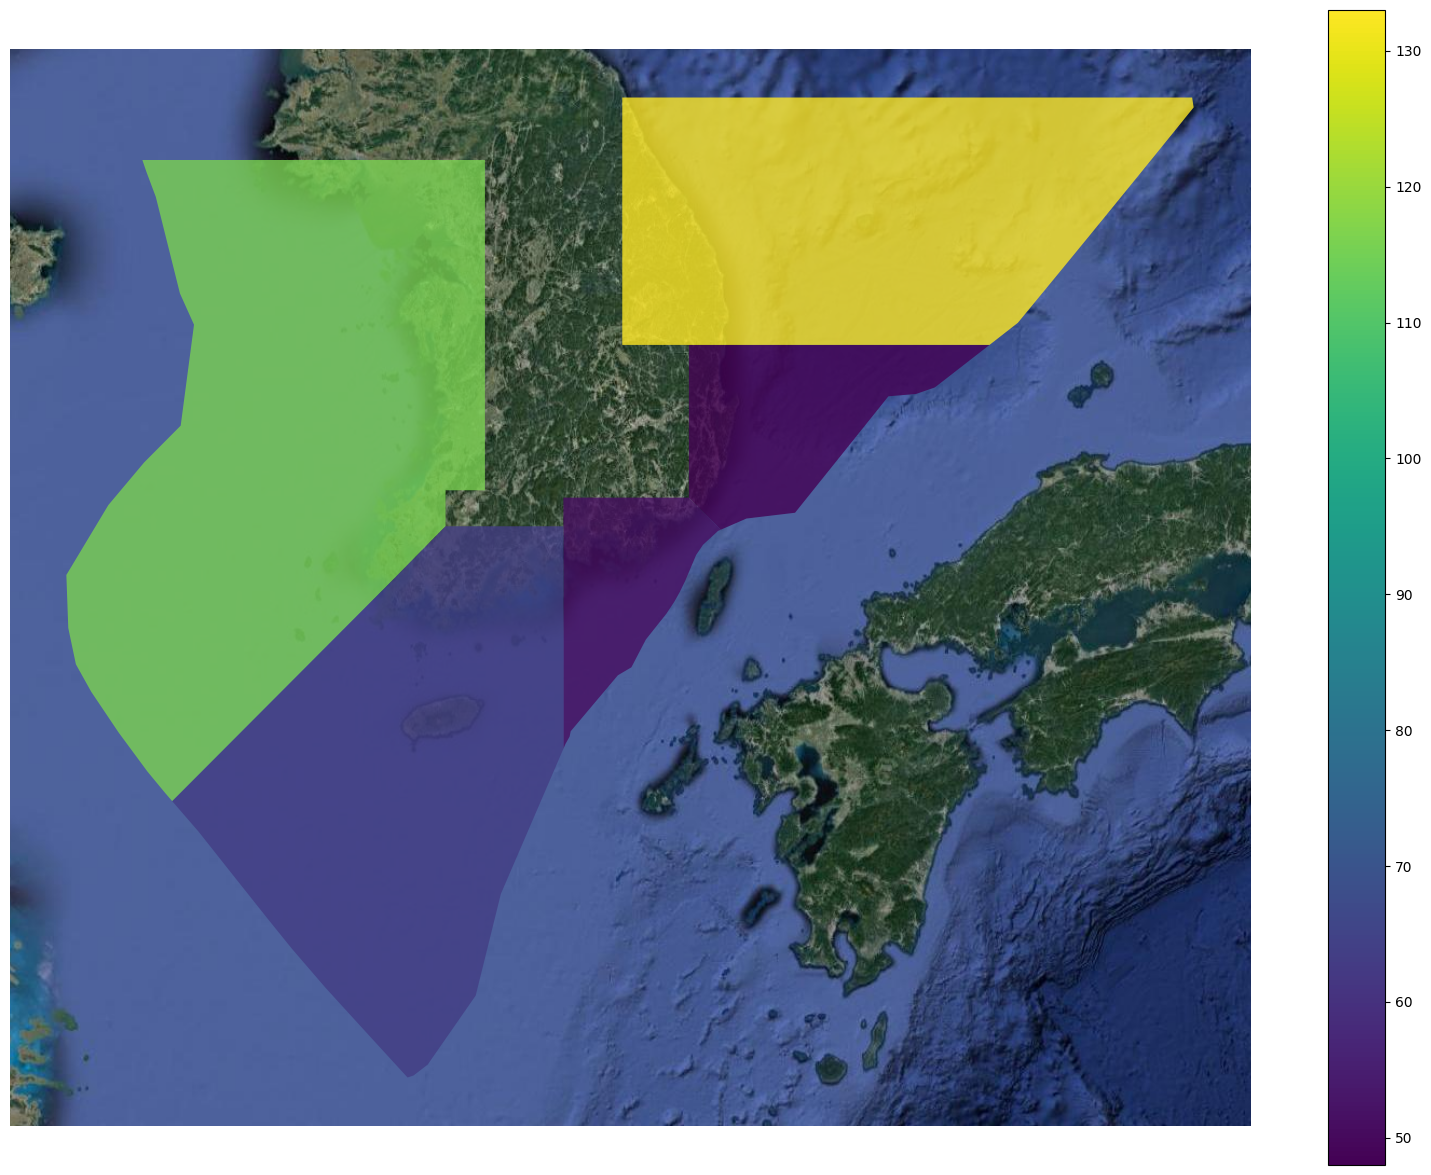

In [37]:
# 단계구분도 시각화
ax = gdf_pg2_3857.plot(column='size', cmap='viridis', alpha=0.8, figsize=(20, 15), legend=True)
ctx.add_basemap(ax, source='http://mt0.google.com/vt/lyrs=s&hl=ko&x={x}&y={y}&z={z}' )
ax.set_axis_off()

### 수고 많으셨습니다! 